<h1 align='center'>Kernel Density Estimator explicado passo a passo<h1/>

Data Science Jr.: Karina Gonçalves Soares

Link de estudo:
* [Kernel Density Estimator explained step by step](https://towardsdatascience.com/kernel-density-estimation-explained-step-by-step-7cc5b5bc4517)

### Introdução
Para ter uma noção da distribuição de dados, desenhamos funções de densidade de probabilidade (PDF). Ficamos satisfeitos quando os dados se ajustam bem a uma função de densidade comum, como normal, Poisson, geométrica, etc. Então, **a abordagem de máxima verossimilhança** pode ser usada para ajustar a função de densidade aos dados.



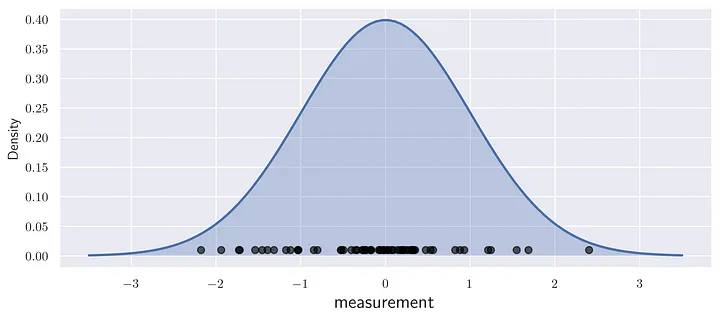

Infelizmente, a distribuição de dados às vezes é muito irregular e não se parece com nenhuma das Funções de Desidade de Probabilidade (PDFs) comuns. Nesses casos, o Estimador de Densidade do Kernel/núcleo (KDE) fornece uma representação racional e visualmente agradável da distribuição de dados.

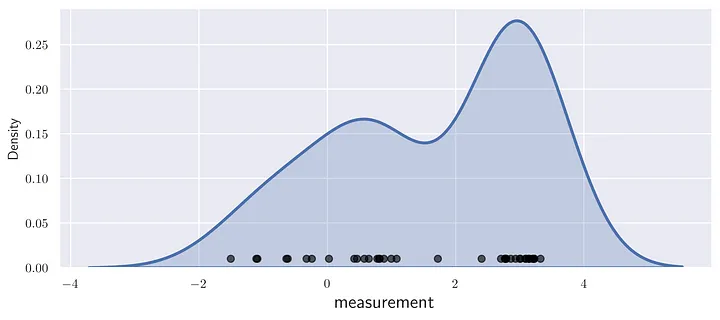

Vamos seguir as etapas de construção do KDE, confiando em sua intuição e não em uma derivação matemática rigorosa.

### A Função do Núcleo
A chave para entender o KDE é pensar nele como **uma função composta de blocos de construção** , semelhante a como diferentes objetos são compostos de peças de Lego. A característica distintiva do KDE é que ele emprega apenas um tipo de tijolo, conhecido como kernel (' um tijolo para governar todos eles '). A principal propriedade deste tijolo é a capacidade de se deslocar e esticar/encolher. **Cada ponto de dados recebe um tijolo e o KDE é a soma de todos os tijolos**.

##### O KDE é uma função composta por um tipo de bloco de construção conhecido como função do kernel.

##### `A função do kernel é avaliada para cada ponto de dados separadamente e esses resultados parciais são somados para formar o KDE`.

O primeiro passo em direção ao KDE é focar em apenas um ponto de dados. O que você faria se fosse solicitado a criar um PDF para um único ponto de dados? Para começar, tome x = 0. A abordagem mais lógica é usar uma PDF que atinge o pico precisamente naquele ponto e decai com a distância dele. A função

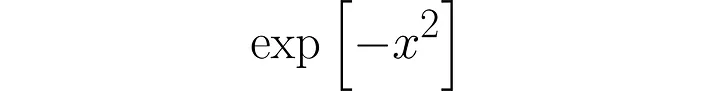

faria o truque.

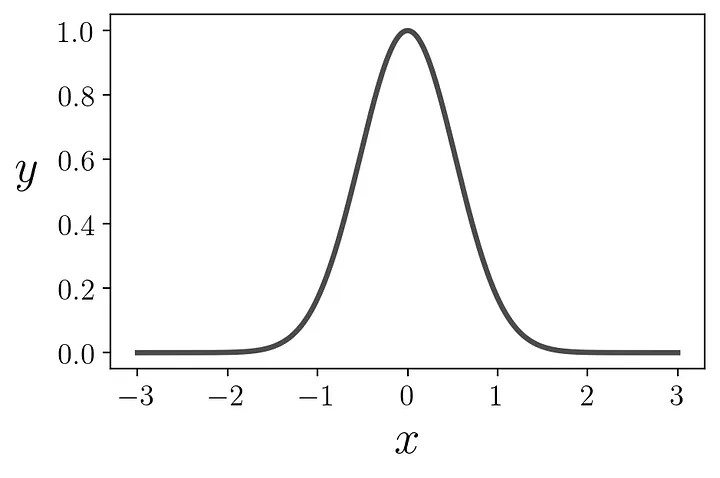

No entanto, como o PDF deve ter uma unidade de área sob a curva, devemos redimensionar o resultado. Portanto, a função deve ser dividida pela raiz quadrada de 2 π e estendida por um fator de √2 ( 3Blue1Brown fornece uma excelente derivação desses fatores):

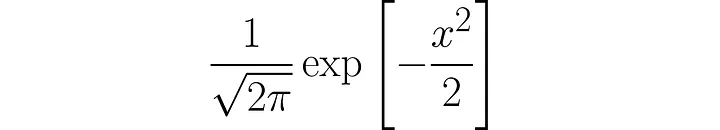

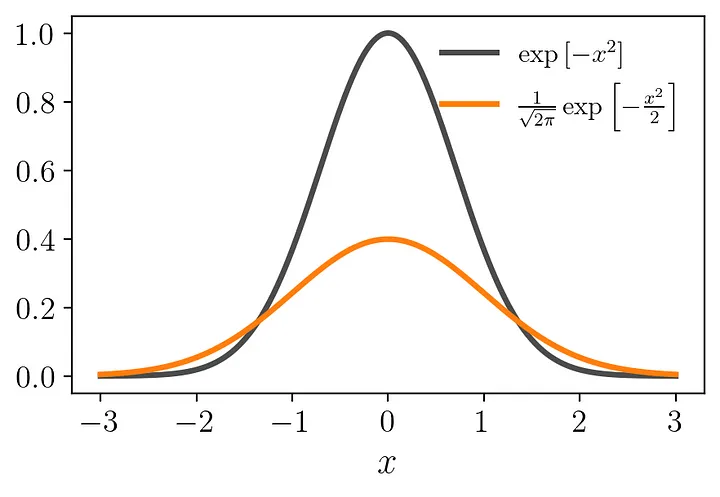

Por fim, chegamos ao nosso tijolo Lego, conhecido como função Kernel , que é um PDF válido:

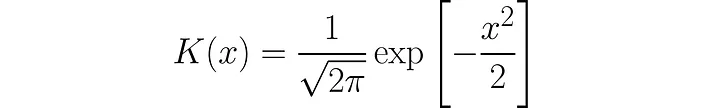


Pegue um único ponto de dados xᵢ - o i -ésimo ponto pertencente ao nosso conjunto de dados X . A mudança pode ser realizada subtraindo o argumento:

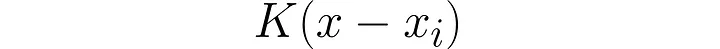